# Missing value imputaion

## 1. For Continuous values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Types of missing value

1.since there are some relationship btw age and cabin , its not missing completely at random

In [5]:
data[data['Embarked'].isnull()] #mcar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. missing data not at random---there is some relationship

 to find the percentage of missing values

In [6]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [7]:
data['Cabin_null'].mean()

0.7710437710437711

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
 data.groupby(data['Survived'])['Cabin_null'].mean() #mean of survived and not survived

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. missing at random

 # handling missing values

### 1. replace with mean/ median/ mode. used in MCAR condition

In [10]:
 df = data[['Age','Fare','Survived']]

In [11]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [12]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [13]:
def handle_null(data,column,median):
    data[column+"_imputed"] = df[column].fillna(median)
    #fillna is used to fill the missing value

In [14]:
median = df['Age'].median()

In [15]:
handle_null(df,'Age',median)

C:\Users\amals\AppData\Local\Temp\ipykernel_27628\2192193895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+"_imputed"] = df[column].fillna(median)


In [16]:
df.head()

,Age,Fare,Survived,Age_imputed
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [17]:
df.isnull().sum()

Age            177
Fare             0
Survived         0
Age_imputed      0
dtype: int64

so here you can see that Age_imputed column has no null values. i just created a new column for imputed age column. the nan values in the age column has been replaced with median

i have used median here because, there might be outliers and it might affect when we compute the mean

In [18]:
print(df['Age_imputed'].std())

13.019696550973194


In [19]:
print(df['Age'].std())

14.526497332334044


we can see a small change in standard deviation , and that doesnt make a problem

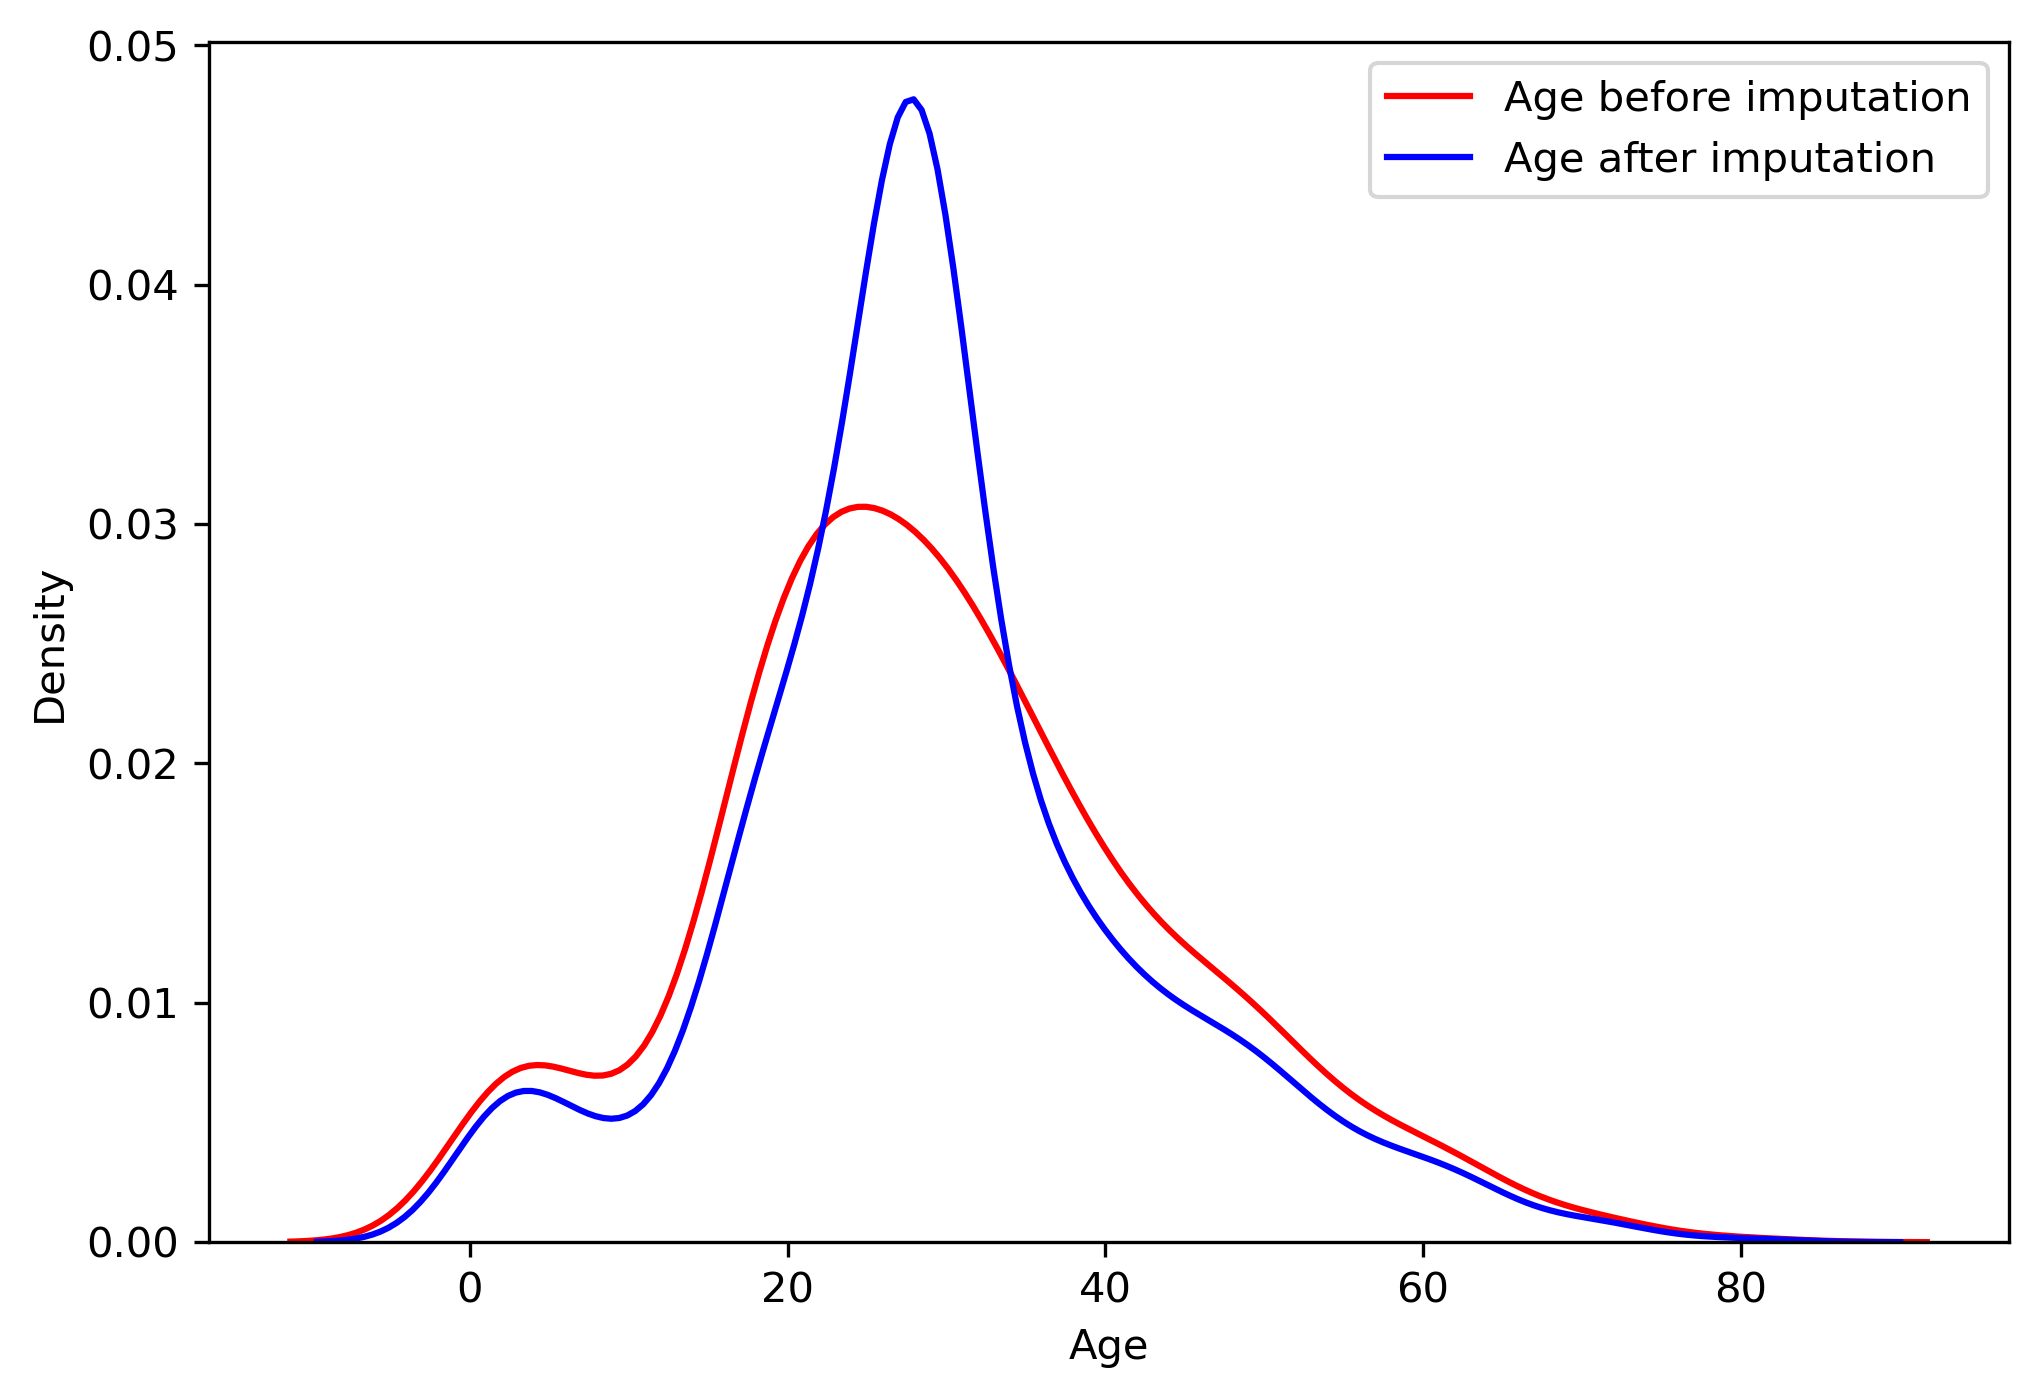

In [20]:
fig = plt.figure(dpi = 300)
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(df['Age'],color = "red",label = 'Age before imputation')
sns.kdeplot(df['Age_imputed'],color = 'Blue',label = 'Age after imputation')
plt.legend()

Advantages:
    1. Straight forward
    2. Easy and faster way to handle null values
    
Disadvantages:
    1. As we have seen in the above plot, there is a slight variance
    2. Correlation will change

In [21]:
df.corr()

,Age,Fare,Survived,Age_imputed
Age,1.000000,0.096067,-0.077221,1.000000
Fare,0.096067,1.000000,0.257307,0.096688
Survived,-0.077221,0.257307,1.000000,-0.064910
Age_imputed,1.000000,0.096688,-0.064910,1.000000


### 2. Random sample imputaion

 takes random observation from the dataset and replace it with Nan values.
      when to use : when data are missing completely at random

In [22]:
df.head()

,Age,Fare,Survived,Age_imputed
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          714 non-null    float64
 1   Fare         891 non-null    float64
 2   Survived     891 non-null    int64  
 3   Age_imputed  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


In [24]:
df.isnull().mean()

Age            0.198653
Fare           0.000000
Survived       0.000000
Age_imputed    0.000000
dtype: float64

In [25]:
df['Age'].isnull().sum()

177

In [26]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [27]:
#creating random value
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
def impute_random(data,column):
    data[column+'_random_imputed'] = data[column]
    random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
    random_sample.index = data[data[column].isnull()].index
    data.loc[data[column].isnull(),column+'_random_imputed'] = random_sample

In [37]:
impute_random(df,'Age')

C:\Users\amals\AppData\Local\Temp\ipykernel_27628\3314709545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+'_random_imputed'] = data[column]


In [30]:
df.isnull().sum()

Age                   177
Fare                    0
Survived                0
Age_imputed             0
Age_random_imputed      0
dtype: int64

In [31]:
df['Age'].std()

14.526497332334044

In [32]:
df['Age_random_imputed'].std()

14.5636540895687

In [35]:
df.head(20)

,Age,Fare,Survived,Age_imputed,Age_random_imputed
0,22.0,7.2500,0,22.0,22.00
1,38.0,71.2833,1,38.0,38.00
2,26.0,7.9250,1,26.0,26.00
3,35.0,53.1000,1,35.0,35.00
4,35.0,8.0500,0,35.0,35.00
5,NaN,8.4583,0,28.0,28.00
6,54.0,51.8625,0,54.0,54.00
7,2.0,21.0750,0,2.0,2.00
8,27.0,11.1333,1,27.0,27.00
9,14.0,30.0708,1,14.0,14.00


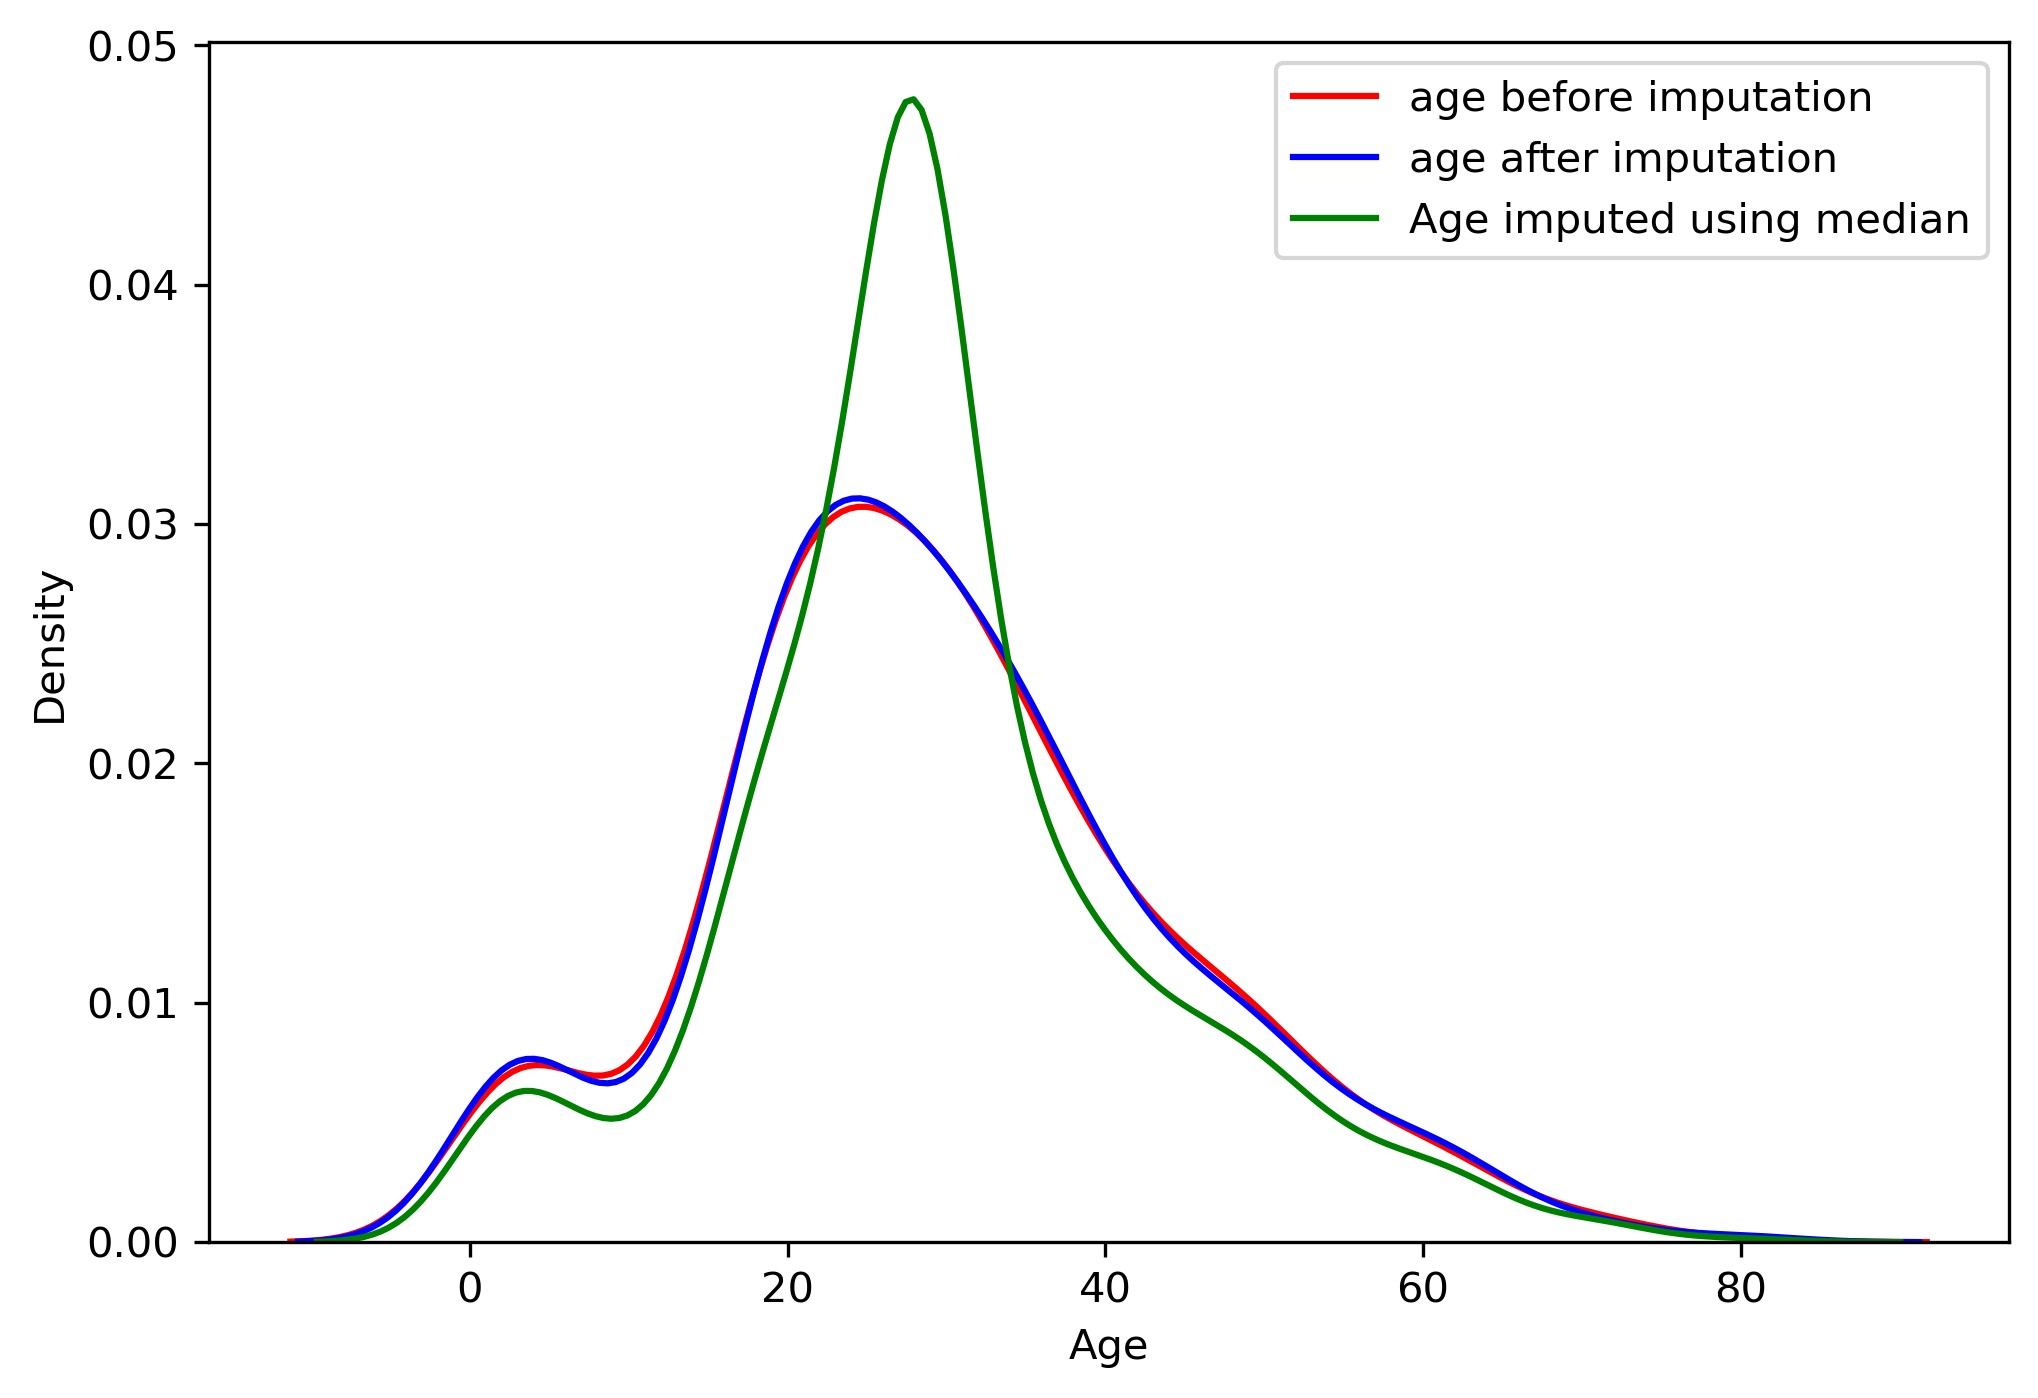

In [39]:
fig = plt.figure(dpi = 300)
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(df['Age'],color = "red",label = "age before imputation")
sns.kdeplot(df['Age_random_imputed'],color = "blue",label = "age after imputation")
sns.kdeplot(df['Age_imputed'],color = 'green',label = 'Age imputed using median')
plt.legend()
plt.show()

as we can see the disadvatage in mean/median/mode imputation i.e. variation btw original feature and imputed feature, in random sample imputation that has been removed

Advantages:
  1. Easy to implement
  2. less difference in variance

Disadvantages:
  1. cant be applicable in every condition.

### 3. Replace NaN with a new variable

when to use : when data is not missing at random(MNAR)

In [40]:
df.head()

,Age,Fare,Survived,Age_imputed,Age_random_imputed
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


In [41]:
df['Age_replaced_with_a_new_variable'] = np.where(df['Age'].isnull(),1,0)

C:\Users\amals\AppData\Local\Temp\ipykernel_27628\1742906231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_replaced_with_a_new_variable'] = np.where(df['Age'].isnull(),1,0)


In [42]:
df.head()

,Age,Fare,Survived,Age_imputed,Age_random_imputed,Age_replaced_with_a_new_variable
0,22.0,7.2500,0,22.0,22.0,0
1,38.0,71.2833,1,38.0,38.0,0
2,26.0,7.9250,1,26.0,26.0,0
3,35.0,53.1000,1,35.0,35.0,0
4,35.0,8.0500,0,35.0,35.0,0


In [46]:
median = df['Age'].median()

In [47]:
df['Age'].fillna(median,inplace = True)

C:\Users\amals\AppData\Local\Temp\ipykernel_27628\399942937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(median,inplace = True)


In [51]:
df.head(10)

,Age,Fare,Survived,Age_imputed,Age_random_imputed,Age_replaced_with_a_new_variable
0,22.0,7.2500,0,22.0,22.0,0
1,38.0,71.2833,1,38.0,38.0,0
2,26.0,7.9250,1,26.0,26.0,0
3,35.0,53.1000,1,35.0,35.0,0
4,35.0,8.0500,0,35.0,35.0,0
5,28.0,8.4583,0,28.0,28.0,1
6,54.0,51.8625,0,54.0,54.0,0
7,2.0,21.0750,0,2.0,2.0,0
8,27.0,11.1333,1,27.0,27.0,0
9,14.0,30.0708,1,14.0,14.0,0


In [50]:
df.isnull().sum()

Age                                 0
Fare                                0
Survived                            0
Age_imputed                         0
Age_random_imputed                  0
Age_replaced_with_a_new_variable    0
dtype: int64

In [48]:
df['Age'].std()

13.019696550973194

Advantages:
    1. easy to implement
    2. gets the importance of missing value
    
Disadvantage:
    1. creates additional column

### 4. End of distribution imputation

when to use : missing not at random

In [103]:
data = pd.read_csv('train_titanic.csv')

In [104]:
df1 = data[['Age','Fare','Survived']]

In [105]:
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [106]:
df1.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

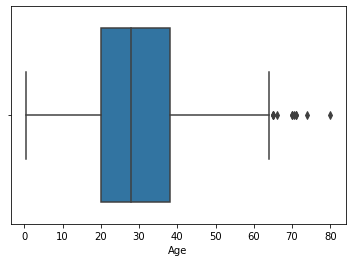

In [107]:
sns.boxplot('Age',data = df1)

<AxesSubplot:>

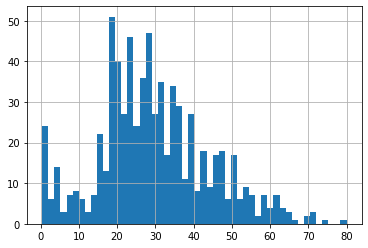

In [108]:
df1['Age'].hist(bins = 50)

since there are outliers in right side, a value is picked up from right end and replace it with Nan values

we take a value after 3rd standard deviation

In [109]:
val = df1['Age'].mean()+3*df1['Age'].std()

In [110]:
median = df1['Age'].median()

In [118]:
def impute_end_dist(data,column,extreme_value,median):
    data[column+"_end_dist"] = data[column].fillna(extreme_value)
    data[column] = data[column].fillna(median)

In [119]:
impute_end_dist(df1,'Age',val,median)

C:\Users\amals\AppData\Local\Temp\ipykernel_27628\4277902191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column+"_end_dist"] = data[column].fillna(extreme_value)
C:\Users\amals\AppData\Local\Temp\ipykernel_27628\4277902191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(median)


In [120]:
df1.head()

,Age,Fare,Survived,Age_end_dist
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [121]:
print(df1['Age'].std())
print(df1['Age_end_dist'].std())

13.019696550973194
21.719150677136366


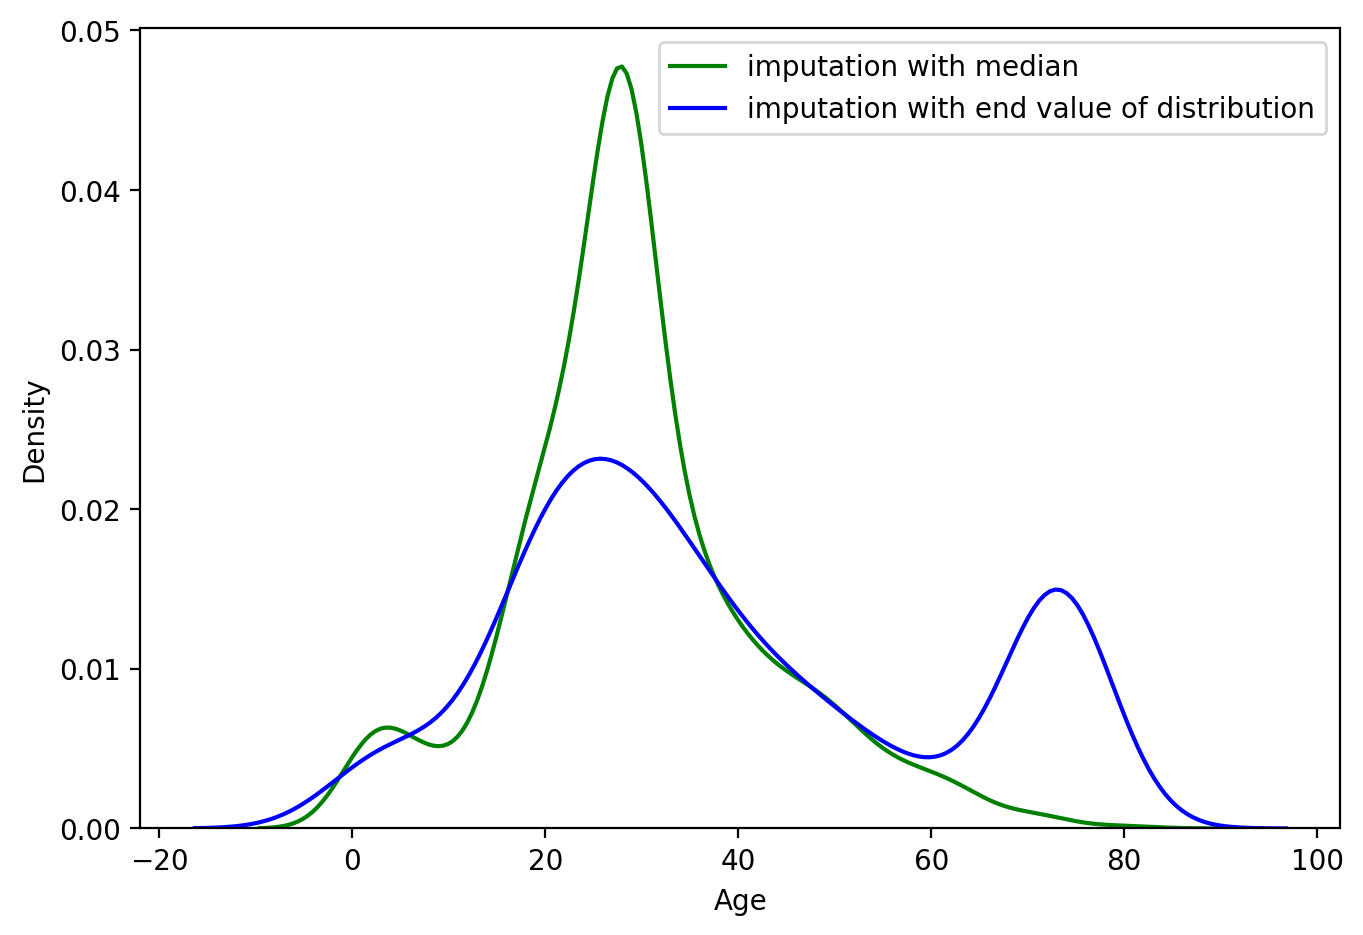

In [124]:
fig = plt.figure(dpi = 200)
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(df1['Age'],color = 'green',label = 'imputation with median')
sns.kdeplot(df1['Age_end_dist'],color = 'blue',label = 'imputation with end value of distribution')
plt.legend()

<AxesSubplot:>

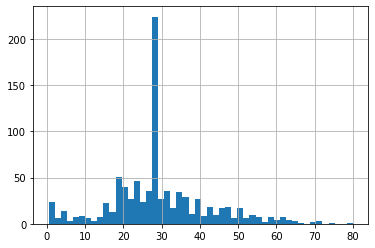

In [125]:
df1['Age'].hist(bins = 50)

<AxesSubplot:>

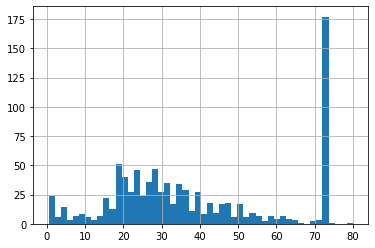

In [126]:
df1['Age_end_dist'].hist(bins = 50)

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_dist'>

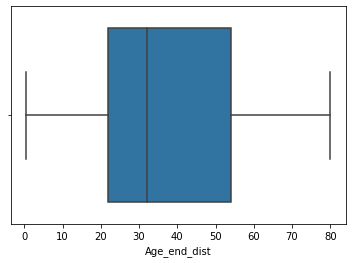

In [128]:
sns.boxplot(df1['Age_end_dist'],data = df1)

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

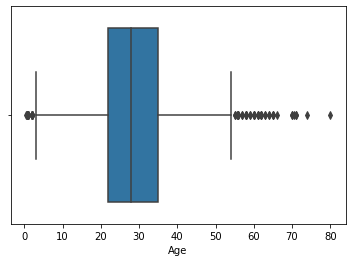

In [129]:
sns.boxplot(df1['Age'],data = df1)

from the above plot we can easily understand that if we replace Nan values with median it only have a smaller variance, and replacing with end value there a bigger variation, but we can also see that outliers is also handled in this.

Advantages:

    1. easy to implement

Disadvantages:

    1. huge variance btw original data and imputed data
    
    2. if number of null values is huge, it will mask the outliers in the distribution
    
    3. if number of null values is less, it may consider the imputed value as outlier